In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import pathlib

In [18]:
# Inputs ETH
run_type = 'ov'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'

filtering_id = 'filters_22March_order_wany_wAnnot'
filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)

In [25]:
# Inputs OHSU
path_ohsu = f'output/kmer_files/J_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March22-2023_inclAnyfilters_results.tar.gz'

In [20]:
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb

metadata = 'metadata2'
path_interest = f'G_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1{metadata}.tsv.gz'

path = os.path.join(filter_dir, path_interest)
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = path_interest.replace('.tsv.gz', '')
pathlib.Path(plot_dir).mkdir(parents=True, exist_ok=True)

# Plot 1

In [5]:
df = pd.read_csv(path, sep = '\t')
print(f'Reading {path}')
display(df.head())


Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA25131301A01R156513all,TCGA61200801A02R156813all,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
0,RMREATKGP,NaN,NaN,NaN,NaN,NaN,NaN,55350885:55350897:55352540:55352555:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
1,QVERMREAT,NaN,NaN,NaN,NaN,NaN,NaN,55350876:55350897:55352540:55352546:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
2,VERMREATK,NaN,NaN,NaN,NaN,NaN,NaN,55350879:55350897:55352540:55352549:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
3,MREATKGPV,NaN,NaN,NaN,NaN,NaN,NaN,55350888:55350897:55352540:55352558:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
4,VQVERMREA,NaN,NaN,NaN,NaN,NaN,NaN,55350873:55350897:55352540:55352543:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False


In [6]:
print(df.columns)


Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGA25131901A01R156513all', 'TCGA25131301A01R156513all',
       'TCGA61200801A02R156813all', 'TCGA24143101A01R156613all',
       'TCGA24229801A01R156913all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available'],
      dtype='object')


In [9]:
recurr_col = 'cancerCohortfilter >0.0'
expr_col = sample_target.replace('-', '') + 'all'
check_in_gtex_coord = 'coordinate_in_GTEX'
check_exons_length = 'gtexExon2<cancExon2'
jxannot = 'junctionAnnotated'
rfannot = 'readFrameAnnotated'
idx = 'index'
info = 'info_not_available'
df = df.sort_values(by=[recurr_col])
df[idx] = np.arange(len(df))

In [10]:
df[[recurr_col, expr_col, check_in_gtex_coord, check_exons_length, jxannot, rfannot, info, idx]]

,cancerCohortfilter >0.0,TCGA25131901A01R156513all,coordinate_in_GTEX,gtexExon2<cancExon2,junctionAnnotated,readFrameAnnotated,info_not_available,index
23947,1,1.678609,True,False,True,True,False,0
51531,1,1.678609,True,False,False,True,False,1
51532,1,1.678609,True,False,False,False,False,2
40570,1,1.678609,True,False,True,False,False,3
40569,1,1.678609,True,False,False,False,False,4
...,...,...,...,...,...,...,...,...
22712,374,1836.398544,True,False,False,False,False,131957
34602,374,53.715497,True,False,True,False,False,131958
58294,374,146.039007,True,False,True,False,False,131959
58315,374,146.039007,True,False,True,False,False,131960


In [7]:
#df = df.tail(50)

/scratch/slurm-job.871838/ipykernel_2969745/4042949736.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.871838/ipykernel_2969745/4042949736.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/plots/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2_Recurr_expr.pdf


/scratch/slurm-job.871838/ipykernel_2969745/4042949736.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


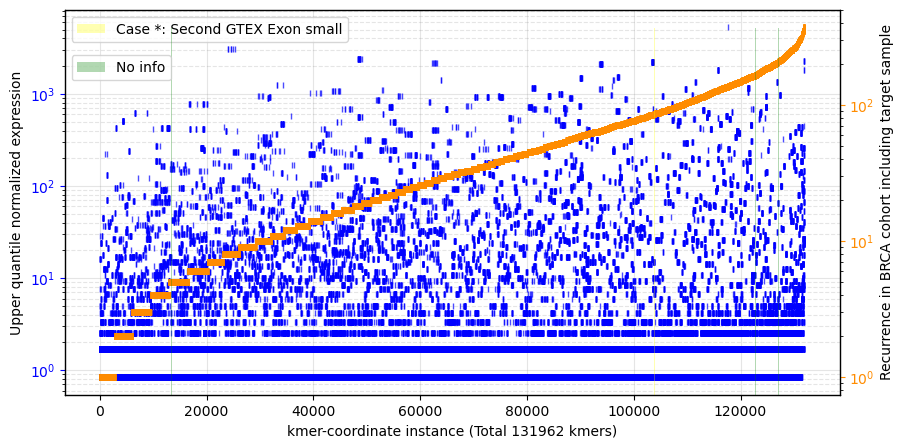

In [21]:
marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color3 = 'yellow'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()


# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[check_exons_length], alpha=alpha_bar, color=color3)
ax3.legend(['Case *: Second GTEX Exon small'], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# Ax 4
ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
ax4.set_yticks([])
ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer-coordinate instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = True
name = 'Recurr_expr'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()

# Plot 2

In [36]:
# Read OHSU Data
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    df_ohsu = pd.read_csv(tar.extractfile(path_ohsu), header=0, sep="\t")

In [37]:
path_ohsu

'output/kmer_files/J_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

In [39]:
df_ohsu.shape


(391040, 1)

In [41]:
df_ohsu.tail()

,kmer
391035,KEGEEANAE
391036,EGEEANAEP
391037,GEEANAEPA
391038,EEANAEPAV
391039,EANAEPAVQ


In [28]:
# Compute shared kmers across the two pipelines
shared_col = 'shared_across_labs'
shared_kmers = set(df_ohsu['kmer']).intersection(set(df['kmer']))

df_ohsu = df_ohsu.set_index('kmer')
df_ohsu.loc[list(shared_kmers), shared_col] = True
df_ohsu = df_ohsu.reset_index().drop_duplicates()

# Merge to ETH
df = df.merge(df_ohsu, on = 'kmer', how = 'left')
df[shared_col] = df[shared_col].fillna(False)

In [31]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available,index,shared_across_labs
0,LKFLYSRPI,NaN,NaN,NaN,NaN,NaN,NaN,1997343:1997348:1993163:1993176:1993078:1993087,True,True,...,0.0,0.0,NaN,-,1993176:1997343:1993163:1993087,True,False,False,0,True
1,RCPNRKGLF,NaN,NaN,NaN,NaN,NaN,NaN,39463539:39463552:39463646:39463660:None:None,False,True,...,0.0,0.0,NaN,+,39463552:39463646,True,False,False,1,True
2,CEEARCPNR,NaN,NaN,NaN,NaN,NaN,NaN,39463527:39463552:39463646:39463648:None:None,False,False,...,0.0,0.0,NaN,+,39463552:39463646,True,False,False,2,True
3,KRLSSRRNV,NaN,NaN,NaN,NaN,NaN,NaN,96296535:96296538:96276903:96276920:96275342:9...,True,False,...,0.0,0.0,NaN,-,96276920:96296535:96276903:96275349,True,False,False,3,True
4,EDVYGEVLA,NaN,NaN,NaN,NaN,NaN,NaN,96299400:96299418:96283343:96283352:None:None,False,False,...,0.0,0.0,NaN,-,96283352:96299400,True,False,False,4,True


/scratch/slurm-job.871838/ipykernel_2969745/3502397169.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.871838/ipykernel_2969745/3502397169.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
/scratch/slurm-job.871838/ipykernel_2969745/3502397169.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


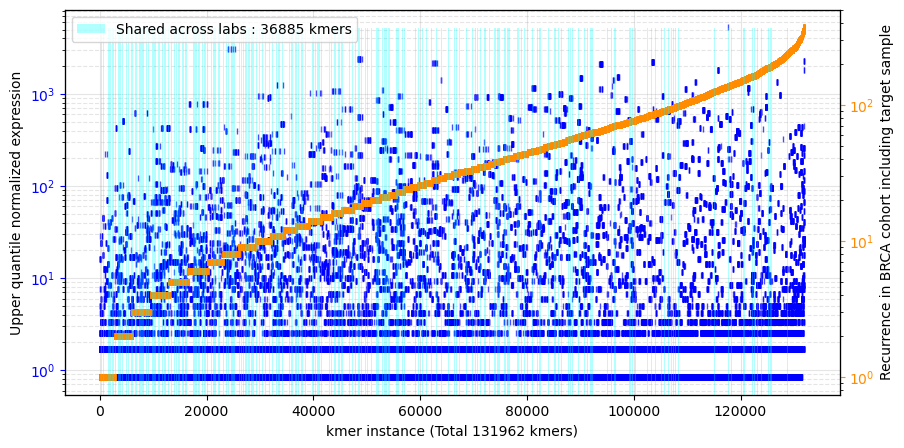

In [32]:
marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color3 = 'cyan'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()


# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[shared_col], alpha=alpha_bar, color=color3)
ax3.legend([f'Shared across labs : {len(shared_kmers)} kmers'], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# # Ax 4
# ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
# ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
# ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
# ax4.set_yticks([])
# ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = False
name = 'Recurr_expr_shareness'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()